# Homework 4
## Due June 6th Midnight

## Problem 1
* Load the worldbank data from workbook 6.

## Problem 2
* Plot a scatter plot of CO2 emission per capita and urban percent for year 2023. Make sure to include a label for the x-axis, y-axis, and main title. Also, make sure the axes are within bound of the data points. Legend should be off and have the graph be in black and white. Share your figure.

## Problem 3
* "Korea, Rep." (South Korea) is one of the most urbanized countries. Can you add a point identifying South Korea on your scatterplot from problem 2? Remember in ```countryname``` South Korea is ```Korea, Rep.``` Share the figure.

## Problem 4
* Estimate ```xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial i.year, vce(robust)``` Use the ```margins``` of at least 50-tile of lnurbper. You can the ```summ lnurbper, detail``` to see the breakdown of lnurbper variable. Then use ```marginsplot``` and edit the main title, y-axs, and x-axis. Share the figure.

In [5]:
*load the data
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
use worldbank.dta,clear

egen area_avg = mean(area), by(countryname)

gen colonial=0
replace colonial=1 if countryname=="Australia"| countryname=="Austria"| countryname=="Belarus" | countryname=="Belgium" | ////
    countryname=="Canada" | countryname=="China" | countryname=="Croatia" | countryname=="Cyprus" | countryname=="Czech Republic" | ////
    countryname=="Denmark" | countryname=="Estonia" | countryname=="Ethiopia" | countryname=="Finland" | countryname=="France" | ////
    countryname=="Germany" | countryname=="Greece" | countryname=="Hungary" | countryname=="Ireland" | countryname=="Israel" | ////
    countryname=="Italy" | countryname=="Japan" | countryname=="Jordan" | countryname=="Kyrgyz Republic" | countryname=="Latvia" | ////
    countryname=="Liberia" | countryname=="Lithuania" | countryname=="Luxembourg" | countryname=="Malta" | countryname=="Moldova" | ////
    countryname=="Mongolia" | countryname=="Montenegro" | countryname=="Netherlands" |countryname== "New Zealand" | ////
    countryname=="North Macedonia" | countryname=="Norway" | countryname=="Poland" | countryname=="Portugal" | countryname=="Romania" | ////
    countryname=="Russia" | countryname=="Serbia" | countryname=="Slovak Republic" | countryname=="South Africa" | ////
    countryname=="Spain" | countryname=="Sweden" | countryname=="Switzerland" | countryname=="United Kingdom" | countryname=="United States"

*log transforming variables
foreach x of varlist area_avg area-urbper {
    gen ln`x' = ln(`x'+1)
    }
    
*countryname is string variable
encode countryname,g(country)

desc

xtset country year


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data


(11 missing values generated)


(495 real changes made)

(11 missing values generated)
(233 missing values generated)
(154 missing values generated)
(108 missing values generated)
(22 missing values generated)



Contains data from worldbank.dta
  obs:         2,387                          
 vars:            15                          8 May 2025 10:49
 size:       300,762                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
countryname     str48   %48s                  
countrycode     str12   %12s                  
year            int     %10.0g                
area            double  %10.0g                area km sq
co2pc           double  %10.0g                Carbon dioxide (CO2) emis

In [59]:
tabstat lnurbper, stat(mean min median max)
summ lnurbper, detail



    variable |      mean       min       p50       max
-------------+----------------------------------------
    lnurbper |  4.029053  2.524288   4.14153   4.61512
------------------------------------------------------


                          lnurbper
-------------------------------------------------------------
      Percentiles      Smallest
 1%     2.728833       2.524288
 5%     3.059176       2.547568
10%     3.288999       2.570931       Obs               2,365
25%     3.763917       2.594359       Sum of Wgt.       2,365

50%      4.14153                      Mean           4.029053
                        Largest       Std. Dev.      .4699415
75%     4.403433        4.61512
90%     4.533438        4.61512       Variance        .220845
95%      4.60462        4.61512       Skewness      -.9123307
99%      4.61512        4.61512       Kurtosis       3.102748


(note:  named style smd not found in class symbol, default attributes used)


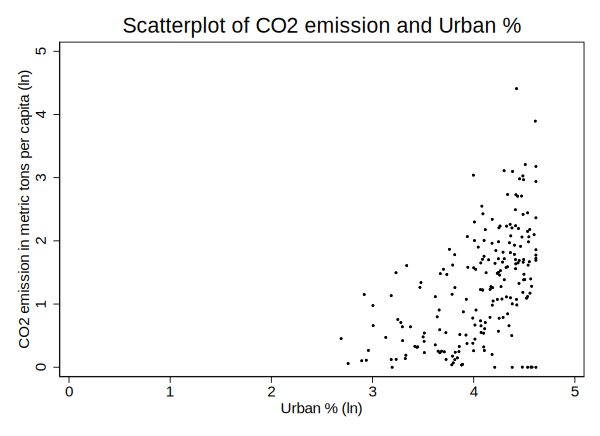

In [39]:
twoway ///
    (scatter lnco2pc lnurbper if year==2023, msymbol(smd) msize(tiny) mcolor(black)), ///
    title("Scatterplot of CO2 emission and Urban %") ///
    ytitle("CO2 emission in metric tons per capita (ln)") ///
    xtitle("Urban % (ln)") ///
    ylabel(0(1)5) ///
    xlabel(0(1)5) ///
    scheme(s1mono) ///
    legend(off)

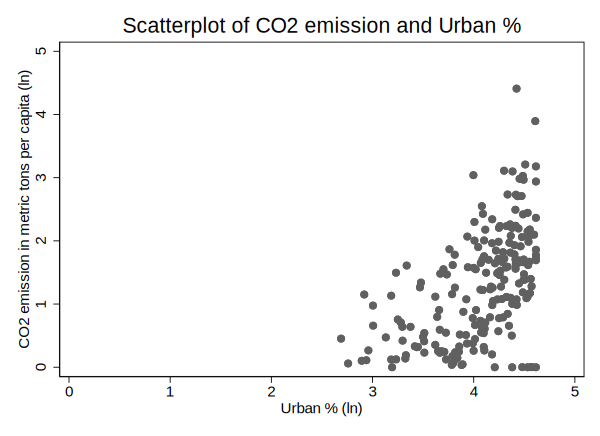

In [41]:
twoway ///
    (scatter lnco2pc lnurbper if year==2023), ///
    title("Scatterplot of CO2 emission and Urban %") ///
    ytitle("CO2 emission in metric tons per capita (ln)") ///
    xtitle("Urban % (ln)") ///
    ylabel(0(1)5) ///
    xlabel(0(1)5) ///
    scheme(s1mono) ///
    legend(off)

In [29]:
list lnco2pc lnurbper if countryname=="Korea, Rep." & year==2023


      +---------------------+
      |  lnco2pc   lnurbper |
      |---------------------|
1155. | 2.492447   4.412265 |
      +---------------------+


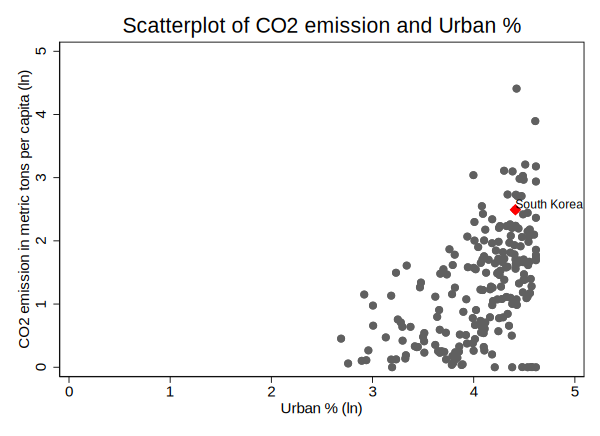

In [58]:
twoway ///
    (scatter lnco2pc lnurbper if year==2023, msymbol(circle)) ///
    (scatteri 2.492447 4.412265, color(red)), ///
    text(2.58 4.4 "South Korea", place(e) size(small)) ///
    title("Scatterplot of CO2 emission and Urban %") ///
    ytitle("CO2 emission in metric tons per capita (ln)") ///
    xtitle("Urban % (ln)") ///
    ylabel(0(1)5) ///
    xlabel(0(1)5) ///
    scheme(s1mono) ///
    legend(off)

In [60]:
xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial i.year, vce(robust)

margins , at(lnurbper=(3.5(.25)4.5))



Random-effects GLS regression                   Number of obs     =      2,157
Group variable: country                         Number of groups  =        198

R-sq:                                           Obs per group:
     within  = 0.1335                                         min =          1
     between = 0.5536                                         avg =       10.9
     overall = 0.5551                                         max =         11

                                                Wald chi2(14)     =     422.26
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

                              (Std. Err. adjusted for 198 clusters in country)
------------------------------------------------------------------------------
             |               Robust
     lnco2pc |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lngdppc |   .2527277  


  Variables that uniquely identify margins: lnurbper


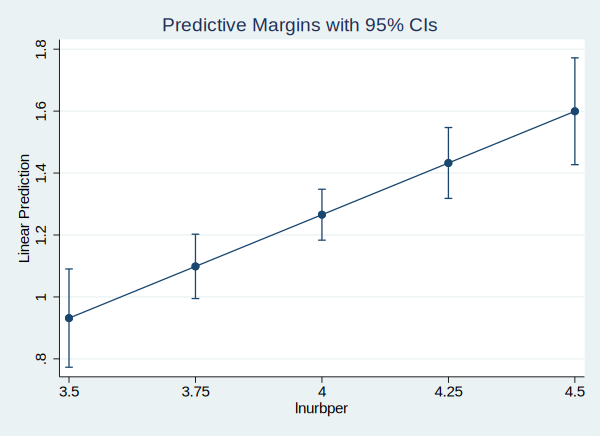

In [62]:
marginsplot


  Variables that uniquely identify margins: lnurbper


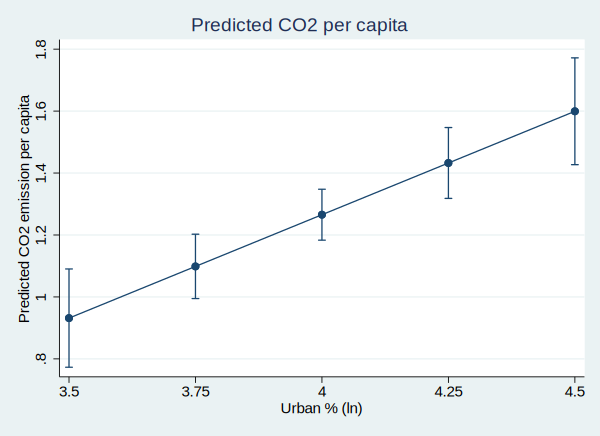

In [65]:
marginsplot, ///
    title("Predicted CO2 per capita") ///
    ytitle("Predicted CO2 emission per capita") ///
    xtitle("Urban % (ln)") 